# BibRec: Training Random Forest Model

### Train Random Forest Model on top-rated books
RF Features: Country, State, Age, Year-of-Publication, Publisher

Experiment 3: test with random 10000 random ratings, and filter books & user, merge inner


In [95]:
# Specify where to save the model
model_file = "rf5-ex3.pkl"

In [96]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                            users_path='data/normalized_users.csv',
                                            ratings_path='data/normalized_ratings.csv')

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", encoding="latin-1")
/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:94: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [97]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,23.327318,nyc,new_york,usa,0.0,0.0
1,2,18.000000,stockton,california,usa,0.0,0.0
2,3,34.700531,moscow,other,other,0.0,0.0
3,4,17.000000,porto,other,portugal,0.0,0.0
4,5,48.545098,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...
278853,278854,67.239608,portland,oregon,usa,7.0,6.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278856,36.069144,brampton,ontario,canada,0.0,0.0
278856,278857,36.706179,knoxville,other,usa,0.0,0.0


In [98]:
books = books.drop(["isbn"], axis=1)
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [99]:
ratings = ratings.drop(["isbn"], axis=1)
ratings

,isbn13,normalized_rating,user_id,book_rating
0,9780155061224,0.0,276726,5
1,9780521656153,-1.5,276729,3
2,9780521795029,1.5,276729,6
3,9780385501200,0.0,276744,7
4,9780385501200,0.0,11676,10
...,...,...,...,...
9444717,9780515107661,0.0,242006,10
9444718,9780515107661,0.0,249628,10
9444719,9780515107661,0.0,276709,10
9444720,9780590442442,0.0,197659,8


In [100]:
# TODO: Experiment 3
# top_ratings = ratings[:10_000]
top_ratings = ratings.sample(frac=1)[:50_000]
# top_ratings = ratings[:1_000_000]

In [101]:
filtered_books = books[books.isbn13.isin(top_ratings.isbn13)]
filtered_books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
5,The Kitchen God's Wife,Amy Tan,1991,other,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,9780399135781,8.176471,17.0,14
18,The Testament,John Grisham,1999,other,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,9780440234746,7.694118,170.0,6
19,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,other,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,9780452264465,7.772152,79.0,11
20,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,other,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,9780609804612,8.307692,13.0,6
26,Wild Animus,Rich Shapero,2004,other,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9780971880108,4.390706,581.0,1
...,...,...,...,...,...,...,...,...,...,...,...
268605,The Man Who Never Was: World War II's Boldest ...,Ewen Montagu,2001,other,http://images.amazon.com/images/P/1557504482.0...,http://images.amazon.com/images/P/1557504482.0...,http://images.amazon.com/images/P/1557504482.0...,9781557504487,10.000000,1.0,4
268652,The Game We Knew: Hockey in the Fifties,Mike Leonetti,1997,other,http://images.amazon.com/images/P/1551921111.0...,http://images.amazon.com/images/P/1551921111.0...,http://images.amazon.com/images/P/1551921111.0...,9781551929,7.000000,1.0,8
268801,Capture the Charm of Your Hometown in Watercolor,Frank Loudin,1998,other,http://images.amazon.com/images/P/0891347925.0...,http://images.amazon.com/images/P/0891347925.0...,http://images.amazon.com/images/P/0891347925.0...,9780891347927,10.000000,1.0,7
269086,Post,Bjork,1996,st_martins_pr,http://images.amazon.com/images/P/0312142382.0...,http://images.amazon.com/images/P/0312142382.0...,http://images.amazon.com/images/P/0312142382.0...,9780312142384,7.000000,1.0,9


In [102]:
filtered_users = users[users.user_id.isin(top_ratings.user_id)]
filtered_users

,user_id,age,city,state,country,user_mean,user_count
15,16,46.981485,albuquerque,other,usa,9.000000,1.0
25,26,12.067215,bellevue,washington,usa,9.500000,2.0
38,39,29.496494,cary,north_carolina,usa,7.500000,2.0
50,51,34.000000,renton,washington,usa,9.000000,1.0
74,75,37.000000,long beach,california,usa,5.000000,1.0
...,...,...,...,...,...,...,...
278831,278832,62.000000,new smyrna beach,florida,usa,10.000000,3.0
278835,278836,47.000000,des moines,washington,usa,8.000000,1.0
278842,278843,28.000000,pismo beach,california,usa,7.888889,18.0
278843,278844,28.000000,st. paul,other,usa,6.000000,2.0


In [103]:
encoded_books = hot_encode_books(filtered_books)
encoded_books

,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
5,The Kitchen God's Wife,Amy Tan,1991,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,9780399135781,8.176471,17.0,14,...,0,0,0,0,0,0,0,0,0,1
18,The Testament,John Grisham,1999,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,9780440234746,7.694118,170.0,6,...,0,0,0,0,0,0,0,0,0,1
19,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,9780452264465,7.772152,79.0,11,...,0,0,0,0,0,0,0,0,0,1
20,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,9780609804612,8.307692,13.0,6,...,0,0,0,0,0,0,0,0,0,1
26,Wild Animus,Rich Shapero,2004,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9780971880108,4.390706,581.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268605,The Man Who Never Was: World War II's Boldest ...,Ewen Montagu,2001,http://images.amazon.com/images/P/1557504482.0...,http://images.amazon.com/images/P/1557504482.0...,http://images.amazon.com/images/P/1557504482.0...,9781557504487,10.000000,1.0,4,...,0,0,0,0,0,0,0,0,0,1
268652,The Game We Knew: Hockey in the Fifties,Mike Leonetti,1997,http://images.amazon.com/images/P/1551921111.0...,http://images.amazon.com/images/P/1551921111.0...,http://images.amazon.com/images/P/1551921111.0...,9781551929,7.000000,1.0,8,...,0,0,0,0,0,0,0,0,0,1
268801,Capture the Charm of Your Hometown in Watercolor,Frank Loudin,1998,http://images.amazon.com/images/P/0891347925.0...,http://images.amazon.com/images/P/0891347925.0...,http://images.amazon.com/images/P/0891347925.0...,9780891347927,10.000000,1.0,7,...,0,0,0,0,0,0,0,0,0,1
269086,Post,Bjork,1996,http://images.amazon.com/images/P/0312142382.0...,http://images.amazon.com/images/P/0312142382.0...,http://images.amazon.com/images/P/0312142382.0...,9780312142384,7.000000,1.0,9,...,0,0,0,0,1,0,0,0,0,0


In [104]:
encoded_users = hot_encode_users(filtered_users)
encoded_users

,user_id,age,city,user_mean,user_count,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
15,16,46.981485,albuquerque,9.000000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25,26,12.067215,bellevue,9.500000,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,39,29.496494,cary,7.500000,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50,51,34.000000,renton,9.000000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,75,37.000000,long beach,5.000000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278831,278832,62.000000,new smyrna beach,10.000000,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278835,278836,47.000000,des moines,8.000000,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278842,278843,28.000000,pismo beach,7.888889,18.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278843,278844,28.000000,st. paul,6.000000,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,publisher_harpercollins,publisher_fawcett_books,publisher_signet_book,publisher_random_house_inc,publisher_st_martins_pr,publisher_st._martin's_press,publisher_tor_books,publisher_harpercollins_publishers,publisher_zebra_books,publisher_other
5,9780399135781,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,9780452264465,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20,9780609804612,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26,9780971880108,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268605,9781557504487,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
268652,9781551929,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
268801,9780891347927,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
269086,9780312142384,9,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
15,16,46.981485,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25,26,12.067215,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,39,29.496494,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50,51,34.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,75,37.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278831,278832,62.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278835,278836,47.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278842,278843,28.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278843,278844,28.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
5781739,9780440234746,94139,8
1289143,9780451142931,134293,8
676938,9780142001745,88187,7
4624598,9780609804131,192211,10
3173294,9780446601856,81597,7
...,...,...,...
160060,9780736909679,271195,8
5119576,9780449223611,34840,9
5733230,9780060987107,168047,9
8337817,9780345337665,41634,7


In [108]:
df = df_ratings
# df = df.merge(df_books, on="isbn13", how="left")
# df = df.merge(df_users, on="user_id", how="left")
df = df.merge(df_books, on="isbn13")
df = df.merge(df_users, on="user_id")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780440234746,94139,8,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780440234746,94139,8,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780440234746,143134,10,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780440234746,143134,10,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780440234746,143134,10,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9783404131600,152805,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,9780316548182,55511,9,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,9780425146415,121282,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49998,9780440223238,143411,8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [110]:
X

,isbn13,normalized_year_of_publication,publisher_harlequin,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,...,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_,state_other
0,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780440234746,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9783404131600,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,9780316548182,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,9780425146415,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49998,9780440223238,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
Y

0         8
1         8
2        10
3        10
4        10
         ..
49995     9
49996     9
49997     9
49998     8
49999     7
Name: book_rating, Length: 50000, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [113]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Loading file: rf5-ex3.pkl


In [114]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.4s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.6s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.9s


building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.2s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.5s


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    1.8s


building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    2.2s


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    2.5s


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    3.0s


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    3.2s finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [115]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [116]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.3s finished


array([8, 5, 4, ..., 3, 8, 7])

In [117]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.72      0.61      0.66       106
           2       0.61      0.55      0.58       184
           3       0.61      0.43      0.50       241
           4       0.50      0.35      0.41       295
           5       0.46      0.39      0.42      1207
           6       0.43      0.37      0.40      1084
           7       0.44      0.44      0.44      2369
           8       0.48      0.53      0.51      3773
           9       0.47      0.47      0.47      2790
          10       0.51      0.53      0.52      2951

    accuracy                           0.48     15000
   macro avg       0.52      0.47      0.49     15000
weighted avg       0.48      0.48      0.48     15000

47.65333333333333


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.3s finished


Confusion matrix, without normalization
[[  65    7    3    1    2    7    4    6    5    6]
 [   8  101    2    7   10    5    5   21   10   15]
 [   5    6  104    2   11   10   21   40   20   22]
 [   1    2    5  103   12   11   42   59   33   27]
 [   0   11    3    9  465   53  135  234  148  149]
 [   2    6    6    3   45  398  113  249  132  130]
 [   0   13   14   11  105   93 1045  456  318  314]
 [   3    6   13   33  163  154  420 2012  481  488]
 [   4    8   11   17  107  107  329  534 1299  374]
 [   2    6   10   20   99   91  271  554  342 1556]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.3s finished


Normalized confusion matrix
[[0.61 0.07 0.03 0.01 0.02 0.07 0.04 0.06 0.05 0.06]
 [0.04 0.55 0.01 0.04 0.05 0.03 0.03 0.11 0.05 0.08]
 [0.02 0.02 0.43 0.01 0.05 0.04 0.09 0.17 0.08 0.09]
 [0.   0.01 0.02 0.35 0.04 0.04 0.14 0.2  0.11 0.09]
 [0.   0.01 0.   0.01 0.39 0.04 0.11 0.19 0.12 0.12]
 [0.   0.01 0.01 0.   0.04 0.37 0.1  0.23 0.12 0.12]
 [0.   0.01 0.01 0.   0.04 0.04 0.44 0.19 0.13 0.13]
 [0.   0.   0.   0.01 0.04 0.04 0.11 0.53 0.13 0.13]
 [0.   0.   0.   0.01 0.04 0.04 0.12 0.19 0.47 0.13]
 [0.   0.   0.   0.01 0.03 0.03 0.09 0.19 0.12 0.53]]


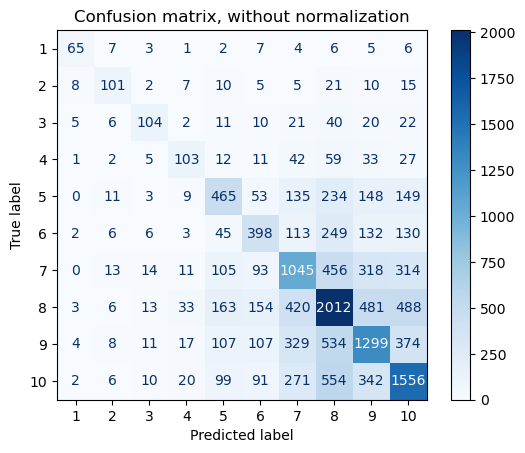

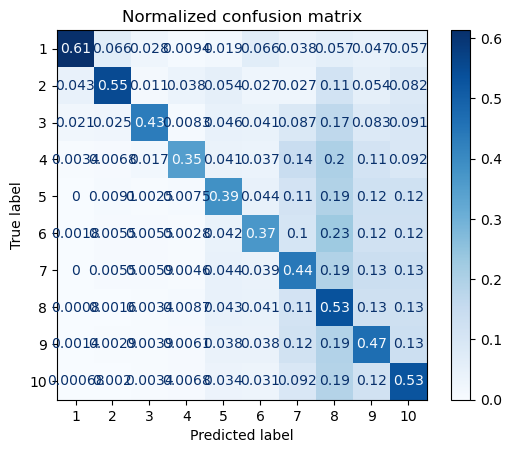

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [119]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.6s finished


0.9536285714285714

In [120]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.474730
0,isbn13,0.196955
1,normalized_year_of_publication,0.174660
65,state_other,0.011738
22,publisher_other,0.007201
...,...,...
38,country_sweden,0.000343
21,publisher_zebra_books,0.000254
17,publisher_st_martins_pr,0.000212
39,country_india,0.000159


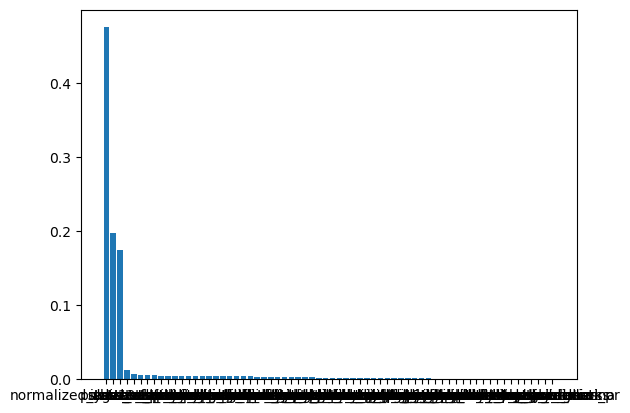

In [121]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [122]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
24,country_usa,0.004693
44,country_other,0.004116
25,country_canada,0.002807
27,country_germany,0.002143
26,country_united_kingdom,0.002048
29,country_australia,0.001682
41,country_malaysia,0.001634
32,country_portugal,0.001519
28,country_spain,0.001439
33,country_new_zealand,0.001125


In [123]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
65,state_other,0.011738
45,state_california,0.005982
49,state_texas,0.005373
50,state_new_york,0.005045
53,state_illinois,0.004865
52,state_pennsylvania,0.004687
57,state_michigan,0.004289
56,state_ohio,0.004258
54,state_washington,0.004191
58,state_oregon,0.004056


In [124]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
22,publisher_other,0.007201
11,publisher_warner_books,0.003779
5,publisher_ballantine_books,0.003581
9,publisher_penguin_books,0.002940
7,publisher_scholastic,0.002920
15,publisher_signet_book,0.002555
4,publisher_pocket,0.002419
6,publisher_bantam_books,0.002333
10,publisher_berkley_publishing_group,0.002102
18,publisher_st._martin's_press,0.001820


In [125]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.47473
Name: Importances, dtype: float64
country_importance: 0.02946997701122486
state_importance: 0.08394779617348966
publisher_importance: 0.04023628221668509
